<a href="https://colab.research.google.com/github/Janvithakur/AI-and-ML/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [47]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing (1).csv


In [48]:
df = pd.read_csv('Housing.csv')

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [51]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})


In [52]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,545
guestroom,545
basement,545
hotwaterheating,545
airconditioning,545


In [54]:
# Select features and target
X = df[['area']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


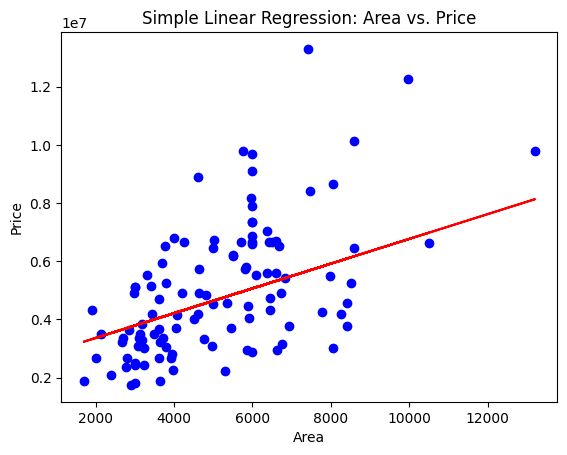

In [55]:
# Plot regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs. Price')
plt.show()


In [56]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R² Score: 0.27287851871974644


In [57]:
print("Intercept:", model.intercept_)
print("Slope (Area):", model.coef_[0])


Intercept: 2512254.2639593435
Slope (Area): 425.72984193878284


In [60]:
# Define features and target for multiple regression
X_multi = df.drop('price', axis=1)
y_multi = df['price']

# ... (rest of your code)

# Convert categorical columns to numerical using one-hot encoding
X_multi = pd.get_dummies(X_multi,
                         columns=['mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning',
                                  'furnishingstatus', 'prefarea']) # Add any other categorical features

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Fit model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# ... (rest of your code)

LinearRegression()

In [64]:
# Evaluation metrics
print("Multiple Regression MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("Multiple Regression MSE:", mean_squared_error(y_test_m, y_pred_m))
print("Multiple Regression R² Score:", r2_score(y_test_m, y_pred_m))


Multiple Regression MAE: 1093398.9896623604
Multiple Regression MSE: 2140232722515.4817
Multiple Regression R² Score: 0.5765747396513359


In [65]:
# Coefficients DataFrame
coeff_df = pd.DataFrame(multi_model.coef_, X_multi.columns, columns=['Coefficient'])
print(coeff_df)


               Coefficient
area          2.758891e+02
bedrooms      1.153839e+05
bathrooms     1.227005e+06
stories       5.092048e+05
parking       3.248995e+05
prefarea_no  -4.299156e+05
prefarea_yes  4.299156e+05
